# Cleaning NBA Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 14 stats columns commonly seen for fantasy points in daily week match
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [4]:
# read in player stats per game data from csv folder
# Ensure first row in the data frame (header = 0), are the headers
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [5]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [6]:
df.sample(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9043,202389,2015-16,76.0,29.0,17.4,2.7,4.7,0.565,0.0,0.1,...,0.9,1.3,0.716,1.4,3.0,0.4,0.9,0.3,0.8,6.3
5402,1477,2008-09,80.0,38.0,18.8,1.0,2.3,0.422,0.5,1.2,...,0.2,0.3,0.538,0.2,1.6,0.5,0.3,0.5,0.2,2.7
9712,202327,2017-18,63.0,31.0,12.9,1.0,1.9,0.500,0.0,0.0,...,0.7,0.9,0.750,1.1,1.3,0.8,0.3,0.7,1.2,2.6
9292,1626170,2016-17,63.0,24.0,16.3,2.0,4.8,0.425,0.8,2.1,...,1.0,1.2,0.890,0.3,1.5,1.9,0.7,0.7,0.1,5.9
640,1134,1997-98,78.0,28.0,29.2,5.2,11.2,0.466,0.0,0.1,...,3.1,4.7,0.669,2.6,4.6,2.2,2.6,0.8,0.7,13.5


In [7]:
# If not already noticeable some additional data is provided in columns
# (min, age, season_id, etc)
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [8]:
# Drop rows that have missing data (only rows where all data is missing)
df_cleaned = df.dropna(how = 'all')

In [9]:
# Drop outliers
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [10]:
# Want to capture players that play more than three standard deviations away from the mean
# This could be that these players may have had injuries or lack of talent
# resulting in the coach not wanting them to play
# These players can weigh down the model if not removed
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std()*3)

In [11]:
min_gp

-22.712012335693153

In [12]:
# Seems like outliers are too far away since negative number is returned

In [13]:
# Different approach use histogram to see min number of games played
# Stop at 82 since there are 82 games in a season
bin_values = np.arange(start = 0, stop = 82, step = 2)

<Axes: >

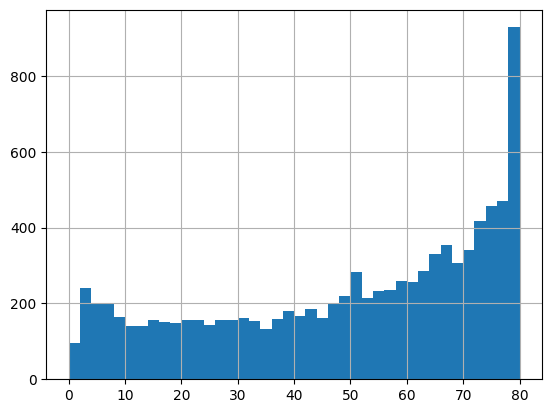

In [14]:
df_cleaned['gp'].hist(bins = bin_values)

In [15]:
# Starts to drop till 10, 10 can be the minimum number of games played

In [16]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp']>min_gp]

In [17]:
# To see how many players dropped
print(df_cleaned['player_id'].count() - df_filter['player_id'].count())

971


In [18]:
df_filter['gp'].describe()

count    9662.000000
mean       57.406541
std        21.069625
min        11.000000
25%        42.000000
50%        63.000000
75%        76.000000
max        85.000000
Name: gp, dtype: float64

# Normalized Data Across Seasons

In [19]:
# Someone who scored 22 points per game in the 1999 season may not be as
# impressive if they scored the same amount of points in the 2019 season
# Rules, play style and other factors have greatly changed 

In [20]:
# Normalize stats for each season
# Function that factors in the season max and min value and normalize that stat
# First try it with a single season before applying to all season stats

In [21]:
season = (df_filter['season_id'] == '2017-18')

In [22]:
df_2018 = df_filter[season]

In [23]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9743,1627824,2017-18,33.0,22.0,7.1,0.8,1.8,0.426,0.4,1.1,...,0.5,0.7,0.682,0.5,1.1,0.5,0.4,0.1,0.2,2.4
9817,1628381,2017-18,74.0,20.0,24.1,4.2,7.4,0.576,0.2,0.6,...,1.8,2.5,0.715,2.4,4.9,1.3,1.4,0.6,1.1,10.5
9673,202732,2017-18,58.0,30.0,12.5,0.7,1.8,0.377,0.3,0.9,...,0.0,0.1,0.400,0.1,1.2,0.8,0.3,0.6,0.2,1.7
10015,1628400,2017-18,73.0,23.0,15.8,0.9,2.6,0.346,0.5,1.7,...,0.3,0.6,0.610,0.5,1.7,0.3,0.3,0.3,0.1,2.7
9644,1626245,2017-18,55.0,25.0,17.8,2.3,3.9,0.591,0.0,0.0,...,1.0,1.5,0.667,1.5,2.7,1.0,1.0,0.3,0.2,5.6
9573,202692,2017-18,64.0,26.0,16.5,2.7,6.5,0.411,0.7,2.2,...,1.7,1.9,0.863,0.3,2.7,1.0,0.9,0.6,0.1,7.7
9939,203118,2017-18,76.0,29.0,18.5,3.6,6.9,0.527,0.9,2.1,...,0.7,1.0,0.658,0.7,2.6,1.1,1.0,0.3,0.1,8.8
9994,202704,2017-18,45.0,28.0,26.7,5.5,12.8,0.426,1.2,3.8,...,2.5,3.0,0.836,0.6,2.1,5.3,2.2,0.6,0.1,14.6
9936,201144,2017-18,12.0,30.0,31.1,5.3,14.0,0.381,2.0,6.4,...,4.4,5.5,0.803,0.0,2.3,4.1,1.5,1.0,0.3,17.1
9883,202498,2017-18,73.0,30.0,18.5,1.4,3.7,0.382,0.7,1.7,...,0.6,0.7,0.830,0.6,1.8,0.6,0.6,0.4,0.2,4.1


In [24]:
# To normalize take the points value substract the column minimum
# divided by the difference between max and min column value

In [25]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min())/(df_2018['pts'].max() - df_2018['pts'].min())

/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_14326/2835687542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min())/(df_2018['pts'].max() - df_2018['pts'].min())


In [26]:
df_2018.sort_values('pts_norm', ascending = False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [27]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [28]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [29]:
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [30]:
def replace(df):
    for cols in cols_to_norm:
        df['{}_norm'.format(cols)] = normalize(df[cols])
    return df

In [31]:
df_2018_norm = replace(df_2018)

/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_14326/3769116981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(cols)] = normalize(df[cols])
/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_14326/3769116981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(cols)] = normalize(df[cols])
/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_14326/3769116981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [32]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9648,1626177,2017-18,31.0,22.0,5.2,0.7,1.3,0.564,0.0,0.0,...,0.000000,0.00,0.045977,0.059406,0.098039,0.037383,0.029126,0.083333,0.02,0.115385
9963,203943,2017-18,54.0,22.0,16.2,1.9,4.3,0.444,0.4,1.2,...,0.095238,0.12,0.080460,0.108911,0.254902,0.401869,0.058252,0.166667,0.12,0.115385
9872,204001,2017-18,48.0,22.0,32.4,8.1,18.5,0.439,1.9,4.8,...,0.452381,0.48,0.517241,0.564356,0.254902,0.476636,0.116505,0.333333,0.38,0.923077
9904,1627736,2017-18,62.0,21.0,9.4,1.2,2.9,0.410,0.5,1.3,...,0.119048,0.13,0.045977,0.049505,0.039216,0.065421,0.048544,0.083333,0.08,0.038462
9774,1627883,2017-18,16.0,25.0,11.3,1.6,4.3,0.382,0.6,1.6,...,0.142857,0.16,0.091954,0.118812,0.156863,0.130841,0.029126,0.125000,0.08,0.038462
9724,1626163,2017-18,79.0,25.0,23.2,3.9,9.1,0.429,1.3,3.5,...,0.309524,0.35,0.229885,0.247525,0.117647,0.271028,0.155340,0.208333,0.16,0.076923
9776,1627750,2017-18,81.0,21.0,31.7,5.9,13.1,0.451,2.0,5.4,...,0.476190,0.54,0.321839,0.306931,0.196078,0.233645,0.330097,0.416667,0.42,0.115385
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,0.000000,0.00,0.126437,0.128713,0.254902,0.299065,0.155340,0.250000,0.20,0.076923
10057,1626203,2017-18,63.0,24.0,16.7,1.5,3.5,0.434,0.6,1.5,...,0.142857,0.15,0.080460,0.089109,0.137255,0.102804,0.087379,0.208333,0.08,0.000000
10072,203092,2017-18,66.0,28.0,16.8,2.8,5.1,0.560,0.2,0.4,...,0.047619,0.04,0.103448,0.118812,0.333333,0.261682,0.067961,0.083333,0.14,0.192308


In [33]:
# Used groupby method to apply this to each seasons
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [34]:
df_new = df_filter.groupby('season_id').apply(replace)
df_new.head(10)

player_id season_id    gp   age   min  fgm   fga  fg_pct  fg3m  \
season_id                                                                      
1996-97   0         471   1996-97  41.0   NaN  13.3  1.1   3.3   0.331   0.2   
          1         920   1996-97  83.0  33.0  30.8  2.8   5.8   0.483   0.0   
          2         243   1996-97  83.0  24.0  20.4  1.8   4.4   0.411   0.5   
          3        1425   1996-97  33.0  25.0  17.8  2.6   4.5   0.574   0.0   
          4         768   1996-97  47.0  27.0  11.1  1.4   3.8   0.374   0.0   
          5         228   1996-97  62.0  27.0  15.4  1.3   2.6   0.513   0.0   
          6         154   1996-97  45.0  30.0  13.1  0.9   2.0   0.435   0.0   
          7         673   1996-97  30.0  24.0  17.2  2.6   5.4   0.475   0.0   
          9         275   1996-97  81.0  26.0  34.3  5.4  12.7   0.423   1.8   
          10        947   1996-97  76.0  22.0  41.1  8.2  19.8   0.416   2.0   

              fg3a  ...  fg3m_norm  fg3a_norm  ftm_norm  fta_norm  oreb_norm  \
season_id           ...                                                        
1996-97   0    0.7  ...   0.071429   0.090909  0.156250  0.127660   0.118644   
          1    0.2  ...   0.000000   0.025974  0.234375  0.255319   0.457627   
          2    1.2  ...   0.178571   0.155844  0.171875  0.138298   0.084746   
          3    0.0  ...   0.000000   0.000000  0.156250  0.159574   0.322034   
          4    0.1  ...   0.000000   0.012987  0.171875  0.191489   0.118644   
          5    0.0  ...   0.000000   0.000000  0.171875  0.180851   0.203390   
          6    0.0  ...   0.000000   0.000000  0.078125  0.117021   0.220339   
          7    0.0  ...   0.000000   0.000000  0.234375  0.265957   0.271186   
          9    4.7  ...   0.642857   0.610390  0.343750  0.287234   0.084746   
          10   6.0  ...   0.714286   0.779221  0.781250  0.765957   0.254237   

              dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  
season_id                                                        
1996-97   0        0.16  0.122807  0.074074  0.181818  0.088235  
          1        0.50  0.070175  0.296296  0.204545  0.058824  
          2        0.20  0.166667  0.333333  0.250000  0.088235  
          3        0.23  0.043860  0.185185  0.227273  0.264706  
          4        0.11  0.035088  0.111111  0.159091  0.176471  
          5        0.21  0.043860  0.185185  0.159091  0.058824  
          6        0.22  0.026316  0.148148  0.136364  0.058824  
          7        0.21  0.070175  0.259259  0.227273  0.058824  
          9        0.22  0.192982  0.185185  0.477273  0.058824  
          10       0.24  0.657895  0.777778  1.000000  0.088235  

[10 rows x 35 columns]

# Distance Error between Players

In [35]:
def calc_distance(plyr1, plyr2):
    # Euclidean measurement between two player's stats
    # Measures the length of a segment connecting the two player's stats
    dist = np.sqrt(np.sum((plyr1-plyr2)**2))
    return dist

In [36]:
# Example Damian Lillard with Stephen Curry and Rudy Gobert
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [37]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols = ['player_id', 'season_id', 'pts'])

In [38]:
# Run a left merge a.k.a a left outer join
# This will keep every row in the left data frame and try and match the 
# right data frame based on the 'on colum'
# If the right data frame doesn't have any of the values then non values will be added
df3 = pd.merge(df1,df2,on = 'player_id', how= 'left')

In [39]:
df3.sample(5)

,player_id,player_name,season_id,pts
1540,201573,Jerryd Bayless,2017-18,7.9
2419,101145,Monta Ellis,2005-06,6.8
3212,2772,Trevor Ariza,2010-11,11.0
1785,203200,Justin Holiday,2018-19,10.5
2997,201150,Spencer Hawes,2007-08,4.7


In [40]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [41]:
df_2019.sample(5)

,player_id,player_name,season_id,pts
69,1626210,Alan Williams,2018-19,3.6
3428,203897,Zach LaVine,2018-19,23.7
3275,1627755,Tyler Ulis,2018-19,0.0
178,101106,Andrew Bogut,2018-19,3.5
1627,203089,John Henson,2018-19,5.6


In [42]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [43]:
# Use to list function so that pts can be accessed as a variable
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [44]:
calc_distance(dame_ppg, curry_ppg)

1.5

In [45]:
calc_distance(dame_ppg, rudy_ppg)

9.9

In [46]:
# As a result Dame and Curry were closer than Dame and Ruby when 
# it came to points per game

# Find Player Func

In [47]:
dataframe = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [48]:
df_sample = dataframe.sample(10)

In [49]:
for row in df_sample.itertuples():
    print(row.season_id,row.player_id)

1998-99 210
2007-08 2742
2000-01 221
1997-98 1037
1998-99 931
2001-02 1710
1996-97 61
1999-00 1890
2008-09 2804
2014-15 2564


In [50]:
def find_player(player_id, player_season):
    for row in df_sample.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [51]:
find_player(2072,'2010-11')

In [52]:
df_sample

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
1273,210,1998-99,36.0,29.0,33.9,5.9,14.1,0.418,0.3,1.3,...,1.8,2.2,0.833,0.8,3.0,8.6,2.1,1.8,0.3,13.9
5281,2742,2007-08,60.0,23.0,32.2,3.7,9.3,0.401,0.5,1.9,...,1.3,1.8,0.743,0.3,2.0,5.9,1.9,1.0,0.2,9.3
1841,221,2000-01,82.0,30.0,33.9,4.2,8.4,0.501,0.0,0.0,...,2.8,3.5,0.790,2.7,7.0,1.3,1.4,1.0,1.3,11.3
827,1037,1997-98,65.0,34.0,15.3,1.2,2.9,0.425,0.0,0.0,...,0.6,1.0,0.569,1.1,3.0,0.6,0.7,0.2,1.0,3.0
1016,931,1998-99,17.0,29.0,21.5,3.7,9.4,0.396,0.5,1.9,...,2.9,4.7,0.625,1.1,2.8,0.9,1.5,0.3,0.3,10.9
2496,1710,2001-02,80.0,24.0,33.2,5.6,12.3,0.453,0.6,1.7,...,1.9,2.4,0.803,0.5,2.3,5.0,1.7,1.1,0.2,13.7
60,61,1996-97,75.0,30.0,25.1,3.4,7.9,0.433,0.0,0.1,...,1.1,1.6,0.686,1.6,3.0,0.7,1.3,0.8,0.7,8.0
1699,1890,1999-00,51.0,22.0,24.8,4.4,9.2,0.471,0.1,0.4,...,1.4,1.7,0.847,2.1,4.5,1.4,1.0,0.7,1.0,10.2
5363,2804,2008-09,76.0,29.0,26.2,3.9,9.2,0.427,1.6,4.1,...,1.9,2.4,0.792,0.7,4.0,1.3,1.5,0.5,0.4,11.4
8155,2564,2014-15,81.0,33.0,24.5,3.6,7.8,0.460,0.7,2.1,...,0.9,1.1,0.774,1.0,3.3,2.9,1.6,0.4,0.3,8.7


In [53]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [54]:
find_player(dataframe, 2544, '2012-13')

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity

In [55]:
# Jrue Holiday
current_player_season = '2016-17'
current_player_id = 201950

##### Summarized everything above to keep things cleaned

In [56]:
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [57]:
df_cleaned = df.dropna(how='all')

In [58]:
min_gp = 10

In [59]:
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [60]:
cols_to_normalize = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [61]:
def replace(df):
    for cols in cols_to_normalize:
        df['{}_norm'.format(cols)] = normalize(df[cols])
    return df

In [62]:
df_norm = df_filter.groupby(['season_id']).apply(replace)

In [63]:
# In the normalized data frame, locate Jrue Holiday with player_id and season_id
# Only retrive the normalized pts indicated by 'pts_norm'
# If that is not included, entire row will be provided assuming .item() isn't included
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item()

In [64]:
jrue_pts_norm

0.474025974025974

In [65]:
current_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item()
])

In [66]:
def player_vector(current_player_id, current_player_season):
    current_player_vector = np.array([
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
        (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item(),
        
    ])
    return current_player_vector
    

In [67]:
def replace(df):
    for cols in cols_to_norm:
        df['{}_norm'.format(cols)] = normalize(df[cols])
    return df

In [68]:
current_player_vector = player_vector(current_player_id, current_player_season)
# Michael Kidd-Gilchrist
compared_player_vector = player_vector(203077, '2013-14')


In [69]:
# Transforms functions that are not numpy aware into a function that can
# return numpy arrays. Since the calc_distance function does not return
# a numpy array, np.vectorize can allows this which also can solve issues with float
vfunc = np.vectorize(calc_distance)

In [70]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [71]:
compared_player_vector

array([0.21766562, 0.59833795, 0.25      , 0.25      , 0.        ,
       0.01265823, 0.20689655, 0.3030303 , 0.33333333, 0.35106383,
       0.07476636, 0.28      , 0.24324324, 0.21428571])

In [72]:
distance_vect

array([0.25636036, 0.25468799, 0.32425743, 0.2887931 , 0.36585366,
       0.40734177, 0.01124438, 0.0736725 , 0.17054264, 0.04413314,
       0.57388229, 0.47      , 0.25675676, 0.05494505])

In [73]:
num = np.sum(np.abs(distance_vect)) / len(distance_vect)

In [74]:
num

0.25374793324911765

# Comparing Multiple Players

In [75]:
player_distance = []

In [76]:
df_sample = df_norm.sample(10)

In [77]:
for row in df_sample.itertuples():
    compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
    ])
    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector,compared_player_vector)
    num = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(num)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(num))

Done with 727. Percent error was 0.15146436232065827
Done with 1887. Percent error was 0.16467000608756766
Done with 2546. Percent error was 0.21933406148123136
Done with 929. Percent error was 0.34758691269730796
Done with 947. Percent error was 0.1704500020221504
Done with 204. Percent error was 0.13623449996157982
Done with 1498. Percent error was 0.24167502872014138
Done with 2757. Percent error was 0.11830447680226111
Done with 251. Percent error was 0.15746351128132932
Done with 203105. Percent error was 0.28654581513342864


In [78]:
player_distance

[0.15146436232065827,
 0.16467000608756766,
 0.21933406148123136,
 0.34758691269730796,
 0.1704500020221504,
 0.13623449996157982,
 0.24167502872014138,
 0.11830447680226111,
 0.15746351128132932,
 0.28654581513342864]

In [79]:
df_sample['distance'] = player_distance

In [80]:
ranked_df = df_sample.sort_values('distance')

In [81]:
ranked_df.head()

player_id season_id    gp   age   min  fgm   fga  fg_pct  \
season_id                                                                  
2007-08   4934       2757   2007-08  65.0  25.0  32.0  5.0  10.9   0.463   
1998-99   1091        204   1998-99  48.0  36.0  29.9  4.5   9.4   0.477   
          1037        727   1998-99  48.0  26.0  35.8  3.1   7.3   0.428   
          1253        251   1998-99  50.0  31.0  30.2  4.2  10.1   0.410   
2000-01   2190       1887   2000-01  82.0  24.0  34.8  5.7  11.2   0.510   

                fg3m  fg3a  ...  fg3a_norm  ftm_norm  fta_norm  oreb_norm  \
season_id                   ...                                             
2007-08   4934   0.8   2.1  ...   0.287671  0.231707  0.211009   0.121951   
1998-99   1091   0.7   1.7  ...   0.239437  0.337662  0.284314   0.125000   
          1037   0.1   0.4  ...   0.056338  0.298701  0.303922   0.083333   
          1253   0.8   2.4  ...   0.338028  0.272727  0.274510   0.125000   
2000-01   2190   0.3   0.9  ...   0.121622  0.265060  0.190840   0.390244   

                dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  distance  
season_id                                                                    
2007-08   4934   0.245283  0.370690  0.333333  0.522727  0.055556  0.118304  
1998-99   1091   0.260870  0.370370  0.407407  0.444444  0.076923  0.136234  
          1037   0.293478  0.583333  0.777778  0.611111  0.000000  0.151464  
          1253   0.369565  0.212963  0.185185  0.361111  0.076923  0.157464  
2000-01   2190   0.391304  0.326531  0.250000  0.414634  0.108108  0.164670  

[5 rows x 36 columns]

In [82]:
df1 = pd.read_csv('../nba-stats-csv/player_info.csv')

In [83]:
ranked_df.reset_index(drop = True, inplace = True)
df1.reset_index(drop = True, inplace = True)

In [84]:
df_final = pd.merge(ranked_df, df1, on = ['player_id', 'season_id'],how = 'left').drop_duplicates()

In [85]:
df_final = df_final[['player_name','player_id', 'season_id', 'distance']]

In [86]:
df_final

,player_name,player_id,season_id,distance
0,Beno Udrih,2757,2007-08,0.118304
3,Jeff Hornacek,204,1998-99,0.136234
6,Eric Snow,727,1998-99,0.151464
9,Sean Elliott,251,1998-99,0.157464
12,Wally Szczerbiak,1887,2000-01,0.164670
15,Allen Iverson,947,1997-98,0.170450
18,Carmelo Anthony,2546,2003-04,0.219334
21,Antonio Daniels,1498,2005-06,0.241675
24,Festus Ezeli,203105,2015-16,0.286546
27,Tracy Moore,929,1996-97,0.347587


# Stat Weightings

In [87]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [88]:
season_id = season_list[18]
print(season_id)

2014-15


In [89]:
season_id = '2014-15'
value = season_list.index(season_id)
print(value)

18


In [90]:
current_season = season_list[season_list.index(season_id)]
print(current_season)

2014-15


In [91]:
next_season = season_list[season_list.index(season_id) + 1]
print(next_season)

2015-16


In [92]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
0,2757,2007-08,65.0,25.0,32.0,5.0,10.9,0.463,0.8,2.1,...,0.287671,0.231707,0.211009,0.121951,0.245283,0.370690,0.333333,0.522727,0.055556,0.118304
1,204,1998-99,48.0,36.0,29.9,4.5,9.4,0.477,0.7,1.7,...,0.239437,0.337662,0.284314,0.125000,0.260870,0.370370,0.407407,0.444444,0.076923,0.136234
2,727,1998-99,48.0,26.0,35.8,3.1,7.3,0.428,0.1,0.4,...,0.056338,0.298701,0.303922,0.083333,0.293478,0.583333,0.777778,0.611111,0.000000,0.151464
3,251,1998-99,50.0,31.0,30.2,4.2,10.1,0.410,0.8,2.4,...,0.338028,0.272727,0.274510,0.125000,0.369565,0.212963,0.185185,0.361111,0.076923,0.157464
4,1887,2000-01,82.0,24.0,34.8,5.7,11.2,0.510,0.3,0.9,...,0.121622,0.265060,0.190840,0.390244,0.391304,0.326531,0.250000,0.414634,0.108108,0.164670
5,947,1997-98,80.0,23.0,39.4,8.1,17.6,0.461,0.9,2.9,...,0.491525,0.628205,0.587719,0.161765,0.257732,0.590476,0.846154,0.857143,0.081081,0.170450
6,2546,2003-04,82.0,20.0,36.5,7.6,17.9,0.426,0.8,2.6,...,0.298851,0.694444,0.633663,0.478261,0.342593,0.304348,0.500000,0.674419,0.138889,0.219334
7,1498,2005-06,80.0,31.0,28.5,2.9,6.9,0.418,0.3,1.3,...,0.154762,0.382979,0.365217,0.054054,0.191919,0.342857,0.280000,0.297297,0.030303,0.241675
8,203105,2015-16,46.0,26.0,16.7,2.7,5.0,0.548,0.0,0.0,...,0.000000,0.170455,0.284314,0.408163,0.330000,0.059829,0.190476,0.173913,0.297297,0.286546
9,929,1996-97,27.0,31.0,9.0,1.2,3.1,0.388,0.4,1.6,...,0.207792,0.125000,0.117021,0.067797,0.040000,0.061404,0.074074,0.113636,0.000000,0.347587


In [93]:
print(current_player_id)
print(current_player_season)

201950
2016-17


In [94]:
# Take the first row of ranked_df : Jameer Nelson
test_df = ranked_df.iloc[0]

In [95]:
weight = (1/test_df.distance)

In [96]:
print(weight)

8.452765499917982


In [97]:
stats

['pts',
 'min',
 'fgm',
 'fga',
 'fg3m',
 'fg3a',
 'ftm',
 'fta',
 'oreb',
 'dreb',
 'ast',
 'stl',
 'tov',
 'blk']

In [98]:
# Create an empty dictionary to store projected stats, for loop will run
# through stats list and muliplty the value by the
# weight which is then divide by the weight to get stats projection.
# Divide total of the value by total of the weight to get the 
# weighted average for a single player
projected_stats = {}

In [99]:
for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['proj_' + col] = (sum_stat / weight)

In [100]:
# These represents projected stats for Jrue Holidary if we used
# Jameer Nelson as a similar player and weighted the distance
projected_stats

{'proj_pts': 12.8,
 'proj_min': 32.0,
 'proj_fgm': 5.0,
 'proj_fga': 10.9,
 'proj_fg3m': 0.8,
 'proj_fg3a': 2.1,
 'proj_ftm': 1.9,
 'proj_fta': 2.3,
 'proj_oreb': 0.5,
 'proj_dreb': 2.8,
 'proj_ast': 4.3,
 'proj_stl': 0.9,
 'proj_tov': 2.3,
 'proj_blk': 0.2}

In [101]:
projected_stats = {}

In [102]:
sum_stat = 0
sum_weight = 0

In [103]:
for row in ranked_df.itertuples():
    weight = (1/row.distance)
    sum_stat = row.pts * weight
    sum_weight += weight

In [104]:
proj_points = (sum_stat/sum_weight)

In [105]:
proj_points

0.19094059234067548

In [106]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index,row in ranked_df.iterrows():
        weight = (1/row.distance)
        sum_stat += row[col] * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat/ sum_weight)

In [107]:
projected_stats

{'player_id': 201950,
 'proj_season_id': '2017-18',
 'proj_pts': 12.740643337270324,
 'proj_min': 31.015775155280622,
 'proj_fgm': 4.737194214972044,
 'proj_fga': 10.426519104169852,
 'proj_fg3m': 0.5521617120914535,
 'proj_fg3a': 1.6579093668460199,
 'proj_ftm': 2.7085979083632794,
 'proj_fta': 3.467477157447836,
 'proj_oreb': 0.937579353493946,
 'proj_dreb': 2.916052626334728,
 'proj_ast': 3.763886962947915,
 'proj_stl': 1.080166557234678,
 'proj_tov': 1.9187013106113557,
 'proj_blk': 0.29631223389986333}

In [108]:
ranked_df.head(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
0,2757,2007-08,65.0,25.0,32.0,5.0,10.9,0.463,0.8,2.1,...,0.287671,0.231707,0.211009,0.121951,0.245283,0.370690,0.333333,0.522727,0.055556,0.118304
1,204,1998-99,48.0,36.0,29.9,4.5,9.4,0.477,0.7,1.7,...,0.239437,0.337662,0.284314,0.125000,0.260870,0.370370,0.407407,0.444444,0.076923,0.136234
2,727,1998-99,48.0,26.0,35.8,3.1,7.3,0.428,0.1,0.4,...,0.056338,0.298701,0.303922,0.083333,0.293478,0.583333,0.777778,0.611111,0.000000,0.151464
3,251,1998-99,50.0,31.0,30.2,4.2,10.1,0.410,0.8,2.4,...,0.338028,0.272727,0.274510,0.125000,0.369565,0.212963,0.185185,0.361111,0.076923,0.157464
4,1887,2000-01,82.0,24.0,34.8,5.7,11.2,0.510,0.3,0.9,...,0.121622,0.265060,0.190840,0.390244,0.391304,0.326531,0.250000,0.414634,0.108108,0.164670


# Getting Weighted Average of Multiple Players Next Season

In [128]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    # Take 10 rows skipping the first (that will be the current player season)
    for index,row in ranked_df.iloc[1:11].iterrows():
        # Dealing with list till 2017-18 for now
        if row.season_id == '2017-18':
            continue
        weight = (1 / row.distance)
        next_season = season_list[(season_list.index(row.season_id) + 1)]
        player_next_season = find_player(ranked_df, row.player_id, next_season)
        
        # Can access attributes of an object
        # getattr()
        # Get attribute of the stat column that will be looped through
        # and access that from the row to be multiplied by the weight
        if player_next_season == None:
            continue
        sum_stats += getattr(player_next_season,col) * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)] 
    projected_stats['proj_' + col] = (sum_stat/sum_weight)
    # This gets the weighted average for 10 similar players' following season to 
    # project the season stats for our current player
    # But this is just for one current player

ZeroDivisionError: division by zero

In [129]:
ranked_df.head(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
0,2757,2007-08,65.0,25.0,32.0,5.0,10.9,0.463,0.8,2.1,...,0.287671,0.231707,0.211009,0.121951,0.245283,0.370690,0.333333,0.522727,0.055556,0.118304
1,204,1998-99,48.0,36.0,29.9,4.5,9.4,0.477,0.7,1.7,...,0.239437,0.337662,0.284314,0.125000,0.260870,0.370370,0.407407,0.444444,0.076923,0.136234
2,727,1998-99,48.0,26.0,35.8,3.1,7.3,0.428,0.1,0.4,...,0.056338,0.298701,0.303922,0.083333,0.293478,0.583333,0.777778,0.611111,0.000000,0.151464
3,251,1998-99,50.0,31.0,30.2,4.2,10.1,0.410,0.8,2.4,...,0.338028,0.272727,0.274510,0.125000,0.369565,0.212963,0.185185,0.361111,0.076923,0.157464
4,1887,2000-01,82.0,24.0,34.8,5.7,11.2,0.510,0.3,0.9,...,0.121622,0.265060,0.190840,0.390244,0.391304,0.326531,0.250000,0.414634,0.108108,0.164670


# Player Comparison Function

In [231]:
def player_comparison_tool(df, current_player_season, current_player_id):
    
    # If player doesn't exist
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return

    # If player does exist
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
    # Using the found current player id, use it to create the player's vector array
    # Done in 'Calculating Player Similarity' Section
    # Use command+shift+L to change df_norm to df
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item(),
    ])
    print('Projecting player_id {0} for season {1}'.format(current_player_id,season_list[(season_list.index(row.season_id) + 1)]))

    player_distance = []

    # To measure the effectiveness of the model
    # Create a list with weighted values for each stats
    # Number in list corresponds to each stat respectively,
    # Ex. If you want pts to weigh more than the other stats increase
    # the value from one
    weighted_numbers = [1,1,1,1,1,1,1,1,1,1,1,1,1,1]

    for row in df.itertuples():
        compared_player_vector = np.array([
            row.pts_norm,
            row.min_norm,
            row.fgm_norm,
            row.fga_norm,
            row.fg3m_norm,
            row.fg3a_norm,
            row.ftm_norm,
            row.fta_norm,
            row.oreb_norm,
            row.dreb_norm,
            row.ast_norm,
            row.stl_norm,
            row.tov_norm,
            row.blk_norm
        ])

        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)

        # Get weighted distance by multiplying the distance vector by the weighted numbers
        weighted_distance = distance_vect * weighted_numbers
        number = np.sum(np.abs(weighted_distance))/len(distance_vect)
        player_distance.append(number)
        
    # New column in dataframe, distance
    # Sort the values of distance and place in ranked_df
    df['distance'] = player_distance
    ranked_df = df.sort_values('distance')

    # Stats to focus on
    stats = [
        'pts',
        'min',
        'fgm',
        'fga',
        'fg3m',
        'fg3a',
        'ftm',
        'fta',
        'oreb',
        'dreb',
        'ast',
        'stl',
        'tov',
        'blk'
    ]

    # Empty dictionary to use for projected stats
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        # Take 10 rows skipping the first (that will be the current player season)
        for index,row in ranked_df.iloc[1:11].iterrows():
            # Dealing with list till 2017-18 for now
            if row.season_id == '2017-18':
                continue
            # Get player's next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # Find player's row using id and th next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
        
            # Can access attributes of an object
            # getattr()
            # Get attribute of the stat column that will be looped through
            # and access that from the row to be multiplied by the weight
            # If player_next_season doesn't exist skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season,col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)] 
        projected_stats['proj_' + col] = (sum_stat/sum_weight)
        
    
    
    # Find 10 most similar players in rows 1:11 of ranked_df
    
    # Determine their next season stats for current player projected stats
    
    return projected_stats

    

In [232]:
ten_players = [
    201935,
    203081,
    201942,
    202339,
    203496,
    203497,
    201567,
    202331,
    202691
]

In [233]:
# Test with their 2017-18 season to predict 2018-19 season
current_player_season = '2017-18'

In [234]:
# Empty list which will contain projections to convert later into dataframe
final_projections = []

In [235]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [236]:
# Drop 2018-19 season data since it will not be used in the projections
df_new = df[df.season_id != '2018-19']

In [237]:
df_cleaned = df_new.dropna(how = 'any')

In [238]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [239]:
df_final = df_filter.groupby(['season_id']).apply(replace)

In [240]:
df_final.tail(5)

player_id season_id    gp   age   min  fgm   fga  fg_pct  \
season_id                                                                   
2017-18   10098    1628380   2017-18  66.0  20.0  15.8  1.7   4.4   0.398   
          10099     203897   2017-18  24.0  23.0  27.3  5.7  14.8   0.383   
          10100       2216   2017-18  59.0  36.0  25.6  6.1  12.9   0.473   
          10101       2585   2017-18  69.0  34.0  14.1  2.2   3.8   0.564   
          10102    1627753   2017-18  18.0  22.0   6.9  0.3   1.8   0.188   

                 fg3m  fg3a  ...  fg3m_norm  fg3a_norm  ftm_norm  fta_norm  \
season_id                    ...                                             
2017-18   10098   0.5   1.7  ...   0.119048       0.17  0.045977  0.059406   
          10099   1.8   5.1  ...   0.428571       0.51  0.413793  0.445545   
          10100   0.9   2.5  ...   0.214286       0.25  0.160920  0.178218   
          10101   0.0   0.0  ...   0.000000       0.00  0.126437  0.128713   
          10102   0.1   1.1  ...   0.023810       0.11  0.045977  0.069307   

                 oreb_norm  dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  
season_id                                                                      
2017-18   10098   0.137255   0.233645  0.077670  0.125000      0.18  0.192308  
          10099   0.078431   0.308411  0.291262  0.416667      0.36  0.076923  
          10100   0.313725   0.457944  0.213592  0.291667      0.40  0.076923  
          10101   0.254902   0.299065  0.155340  0.250000      0.20  0.076923  
          10102   0.058824   0.065421  0.009709  0.041667      0.12  0.307692  

[5 rows x 35 columns]

In [241]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [242]:
# Function to calculate distance between two points
def calc_distance(plyr1, plyr2):
    # Euclidean measurement between two player's stats
    # Measures the length of a segment connecting the two player's stats
    dist = np.sqrt(np.sum((plyr1-plyr2)**2))
    return dist

# Create a function to find the player and the next season
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [243]:
for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201935 for season 2018-19
Projecting player_id 203081 for season 2018-19
Projecting player_id 201942 for season 2018-19
Projecting player_id 202339 for season 2018-19
Projecting player_id 203496 for season 2018-19
Projecting player_id 203497 for season 2018-19
Projecting player_id 201567 for season 2018-19
Projecting player_id 202331 for season 2018-19
Projecting player_id 202691 for season 2018-19


In [244]:
final_projections

[{'player_id': 201935,
  'proj_season_id': '2018-19',
  'proj_pts': 27.43275293901888,
  'proj_min': 37.27557007949852,
  'proj_fgm': 8.739531247293517,
  'proj_fga': 19.326112130789124,
  'proj_fg3m': 2.4416014820332617,
  'proj_fg3a': 6.9208700867352,
  'proj_ftm': 7.523821728165839,
  'proj_fta': 8.988620200157476,
  'proj_oreb': 0.8919017968376578,
  'proj_dreb': 5.16723234850663,
  'proj_ast': 6.767128563607211,
  'proj_stl': 1.5624887764528956,
  'proj_tov': 3.839135611297285,
  'proj_blk': 0.545122647769738},
 {'player_id': 203081,
  'proj_season_id': '2018-19',
  'proj_pts': 23.961182438944764,
  'proj_min': 36.33941004840615,
  'proj_fgm': 8.002104609029969,
  'proj_fga': 18.622465082207462,
  'proj_fg3m': 2.1210361807969726,
  'proj_fg3a': 6.107645069732469,
  'proj_ftm': 5.836247539016859,
  'proj_fta': 6.92643264956056,
  'proj_oreb': 0.7750174504531169,
  'proj_dreb': 3.456128912076116,
  'proj_ast': 5.515011529210231,
  'proj_stl': 1.1604155587492513,
  'proj_tov': 2.8427

In [245]:
test_projections = pd.DataFrame(final_projections)

In [246]:
test_projections.sample(5)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
8,202691,2018-19,18.061929,32.795525,6.645460,14.856647,2.492970,6.081687,2.279072,2.726848,0.517293,3.057180,2.534957,0.871289,1.582275,0.404177
5,203497,2018-19,13.598591,33.840094,5.088183,9.676985,0.000000,0.019645,3.412895,5.002986,3.006831,7.376115,1.067471,0.644914,1.971088,2.611179
1,203081,2018-19,23.961182,36.339410,8.002105,18.622465,2.121036,6.107645,5.836248,6.926433,0.775017,3.456129,5.515012,1.160416,2.842701,0.407752
2,201942,2018-19,20.980942,34.625592,7.228287,16.349121,1.107141,3.257628,5.398346,6.510371,0.834226,3.305773,3.592760,1.001176,2.094358,0.252092
6,201567,2018-19,16.005472,31.065801,5.537316,12.315330,1.680536,4.407987,3.292168,3.961869,1.789662,6.533117,1.835934,0.752829,1.633219,0.609121


In [247]:
# Retrive player names from csv folder and merge it with their player_id
df_names = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [248]:
final_stat_df = pd.merge(test_projections, df_names, left_on=['player_id'], right_on = ['player_id'], how = 'inner')

In [249]:
round(final_stat_df, 1)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk,player_name
0,201935,2018-19,27.4,37.3,8.7,19.3,2.4,6.9,7.5,9.0,0.9,5.2,6.8,1.6,3.8,0.5,James Harden
1,203081,2018-19,24.0,36.3,8.0,18.6,2.1,6.1,5.8,6.9,0.8,3.5,5.5,1.2,2.8,0.4,Damian Lillard
2,201942,2018-19,21.0,34.6,7.2,16.3,1.1,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3,DeMar DeRozan
3,202339,2018-19,15.8,32.9,5.6,13.0,1.4,3.9,3.2,3.8,0.6,3.0,5.2,1.4,2.1,0.4,Eric Bledsoe
4,203496,2018-19,9.6,27.5,3.6,8.5,1.4,4.0,1.1,1.5,0.8,3.2,1.9,1.3,1.1,0.4,Robert Covington
5,203497,2018-19,13.6,33.8,5.1,9.7,0.0,0.0,3.4,5.0,3.0,7.4,1.1,0.6,2.0,2.6,Rudy Gobert
6,201567,2018-19,16.0,31.1,5.5,12.3,1.7,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6,Kevin Love
7,202331,2018-19,18.1,34.6,6.3,15.0,2.4,6.3,3.1,3.9,0.9,3.9,4.3,1.3,2.2,0.4,Paul George
8,202691,2018-19,18.1,32.8,6.6,14.9,2.5,6.1,2.3,2.7,0.5,3.1,2.5,0.9,1.6,0.4,Klay Thompson


In [224]:
player_info_columns = [
    'player_name',
    'player_id',
    'proj_season_id'
]

In [225]:
player_info = final_stat_df[['player_name', 'player_id', 'proj_season_id']]

In [226]:
final_stat_df.to_csv('../nba-stats-csv/player_proj_df.csv', index = False)
player_info.to_csv('../nba-stats-csv/player_info_df.csv', index = False)

# RMSE Model Evaluation

In [250]:
# Root Mean Squared Error:
# Takes the mean of the squared error values
# Take the difference between each projected stat and the actual stat (the error)
# Square this difference
# Take the mean of all squared difference and then take its square root

In [254]:
# For example, calculate RMSE for point projections
import pandas as pd
import numpy as np

In [255]:
proj_df = pd.read_csv('../nba-stats-csv/player_proj_df_original.csv')
proj_df.head()

,player_id,proj_ast,proj_blk,proj_dreb,proj_fg3a,proj_fg3m,proj_fga,proj_fgm,proj_fta,proj_ftm,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,203932,1.994430,0.710601,5.126943,3.961834,1.402502,13.509175,5.956650,3.608475,2.800268,...,2.4,3.2,0.731,1.7,5.7,3.7,2.1,0.7,0.7,16.0
1,201143,3.247733,1.025916,4.582944,3.079483,1.127251,10.359166,4.860939,1.927194,1.470858,...,1.1,1.4,0.821,1.8,5.0,4.2,1.5,0.9,1.3,13.6
2,202329,1.754433,0.446132,4.286956,3.877699,1.407756,8.190519,3.574506,1.679742,1.238291,...,1.9,2.1,0.867,1.4,6.1,1.3,0.9,0.8,0.4,9.4
3,202692,1.525246,0.143212,1.894640,2.190524,0.692337,7.286938,3.014837,2.166992,1.667793,...,1.8,2.2,0.823,0.5,3.2,2.0,1.0,0.6,0.3,8.8
4,203518,0.988705,0.112903,1.361302,2.800757,1.065089,4.592593,1.876591,0.839953,0.668980,...,0.4,0.4,0.923,0.2,1.4,0.6,0.5,0.5,0.2,5.3


In [257]:
proj_df['squared_error'] = (proj_df['proj_pts'] - proj_df['pts'])**(2)

In [258]:
mse = proj_df['squared_error'].mean()

In [259]:
rmse = mse ** (1/2)

In [260]:
rmse

3.302971088916984

In [261]:
proj_df['squared_error'] = (proj_df['proj_ast'] - proj_df['ast'])**(2)

In [262]:
mse = proj_df['squared_error'].mean()

In [263]:
rmse = mse ** (1/2)

In [264]:
rmse

0.9944342105776937

In [267]:
# Using Scikit-learn module for a mse function
from sklearn.metrics import mean_squared_error
from math import sqrt

In [269]:
player_proj = pd.read_csv('../nba-stats-csv/player_proj_df_original.csv')
player_info = pd.read_csv('../nba-stats-csv/player_info_df_original.csv')

In [270]:
player_proj.sample(5)

,player_id,proj_ast,proj_blk,proj_dreb,proj_fg3a,proj_fg3m,proj_fga,proj_fgm,proj_fta,proj_ftm,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
308,2585,0.792398,0.252155,2.250570,0.043625,0.000000,4.137357,1.887957,1.228401,0.920766,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
97,203914,2.670911,0.303032,3.253948,4.415865,1.708421,14.016625,5.968277,2.885790,2.271508,...,2.0,2.5,0.799,0.7,2.1,2.2,1.2,1.0,0.3,12.9
96,202066,1.976895,0.229223,2.133305,3.010241,1.109317,7.782001,3.325240,1.400585,1.129838,...,1.1,1.4,0.748,0.4,2.5,1.4,0.9,1.0,0.4,7.8
122,203109,1.355455,0.175954,2.464703,3.544201,1.278828,7.431207,3.140474,1.374845,1.111105,...,1.8,2.5,0.721,0.8,4.1,1.7,1.1,0.8,0.4,11.9
228,1626192,0.917390,0.135033,1.788368,1.981346,0.726878,4.651982,1.936733,0.513579,0.361325,...,0.5,0.7,0.725,1.0,3.2,2.0,0.5,0.5,0.4,6.9


In [274]:
# Split projection df into two separate df
# One with real projections (true values)
# Other with projection stats (predictve values)
df_real = player_proj.loc[:,['pts',
        'min',
        'fgm',
        'fga',
        'fg3m',
        'fg3a',
        'ftm',
        'fta',
        'oreb',
        'dreb',
        'ast',
        'stl',
        'tov',
        'blk']]

In [275]:
df_proj = player_proj.loc[:,['proj_pts',
        'proj_min',
        'proj_fgm',
        'proj_fga',
        'proj_fg3m',
        'proj_fg3a',
        'proj_ftm',
        'proj_fta',
        'proj_oreb',
        'proj_dreb',
        'proj_ast',
        'proj_stl',
        'proj_tov',
        'proj_blk']]


In [276]:
df_real.sample(5)

,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
304,7.3,14.0,2.6,5.1,0.3,0.7,1.7,2.5,2.0,3.3,1.0,0.3,1.0,0.3
129,36.1,36.8,10.8,24.5,4.8,13.2,9.7,11.0,0.8,5.8,7.5,2.0,5.0,0.7
122,11.9,27.1,4.0,10.0,2.2,6.5,1.8,2.5,0.8,4.1,1.7,0.8,1.1,0.4
32,6.4,16.2,2.1,5.9,1.3,3.8,0.9,1.1,0.2,1.5,0.7,0.5,0.6,0.3
163,15.2,28.0,5.4,12.2,1.6,4.9,2.7,3.5,1.0,3.7,1.2,1.2,1.5,0.9


In [277]:
df_proj.sample(5)

,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
82,8.921687,25.216003,3.521983,7.701529,0.371110,1.193565,1.520853,2.174359,1.768788,3.829583,1.310199,0.862845,1.254290,0.540478
32,9.960244,24.448746,3.414547,8.517007,1.785434,4.838338,1.344834,1.597099,0.335979,2.389518,1.479724,0.591862,1.018219,0.226946
181,9.008017,25.130936,3.583865,8.135413,0.701404,2.118389,1.168553,1.539440,0.783970,3.185024,2.612365,0.643780,1.569401,0.223031
295,4.537447,15.534804,1.711593,4.456530,0.322845,1.142065,0.787995,1.079924,0.453796,1.188816,2.795242,0.845485,1.032454,0.177155
76,12.810981,27.992943,5.159841,10.676117,0.034380,0.180853,2.505184,3.234344,2.362003,4.842272,1.313738,0.731821,1.695249,0.617080


In [278]:
se = mean_squared_error(df_real,df_proj)

In [279]:
mse = np.mean(se)

In [280]:
rmse = np.sqrt(mse)

In [281]:
confidence =  rmse

In [282]:
print('{0} percent condfidence in projected {1} per game stats'.format(100 - round(confidence,2), '2018-19'))

98.03 percent condfidence in projected 2018-19 per game stats


In [284]:
# Concatenate the real and projected data frames with player info data frame
# to see the names and numbers

# Axis = 1 is for column
df_real_stats = pd.concat([player_info, df_real], axis = 1)

In [285]:
df_real_stats.sample(5)

,player_name,player_id,proj_season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
208,Mike Muscala,203488,2018-19,7.0,20.4,2.3,5.6,1.4,4.0,1.1,1.3,0.9,2.9,1.2,0.3,0.8,0.6
95,Fred VanVleet,1627832,2018-19,11.0,27.5,3.8,9.4,1.8,4.6,1.5,1.8,0.3,2.3,4.8,0.9,1.3,0.3
147,John Wall,202322,2018-19,20.7,34.5,7.7,17.3,1.6,5.3,3.8,5.5,0.5,3.2,8.7,1.5,3.8,0.9
179,Kyrie Irving,202681,2018-19,23.8,33.0,9.0,18.5,2.6,6.5,3.2,3.7,1.1,3.9,6.9,1.5,2.6,0.5
170,Kevon Looney,1626172,2018-19,6.3,18.5,2.7,4.3,0.0,0.1,0.8,1.3,2.4,2.8,1.5,0.6,0.6,0.7


In [286]:
df_real_stats.rename(columns  = {'proj_season_id' : 'season_id'}, inplace = True)

In [287]:
df_real_stats.sample(5)

,player_name,player_id,season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
159,Justise Winslow,1626159,2018-19,12.6,29.7,4.9,11.3,1.5,3.9,1.3,2.1,1.0,4.4,4.3,1.1,2.2,0.3
52,Dante Cunningham,201967,2018-19,3.0,14.5,1.2,2.5,0.5,1.0,0.2,0.3,0.8,2.2,0.8,0.4,0.3,0.2
17,Austin Rivers,203085,2018-19,8.1,26.7,3.1,7.5,1.4,4.3,0.7,1.3,0.3,1.8,2.2,0.6,0.9,0.3
256,Sam Dekker,1626155,2018-19,6.1,16.8,2.6,5.4,0.4,1.3,0.6,1.0,1.1,2.0,1.0,0.8,0.5,0.1
9,Andre Drummond,203083,2018-19,17.3,33.5,7.1,13.3,0.1,0.5,3.1,5.2,5.4,10.2,1.4,1.7,2.2,1.7


In [289]:
df_proj_stats = pd.concat([player_info, df_proj], axis = 1)

In [291]:
df_proj_stats.rename(columns = {'proj_season_id' :'season_id',
                               'proj_pts': 'pts' ,
                                'proj_min': 'min',
                                'proj_fgm':'fgm',
                                'proj_fga': 'fga',
                                'proj_fg3m': 'fg3m',
                                'proj_fg3a': 'fg3a',
                                'proj_ftm': 'ftm',
                                'proj_fta': 'fta',
                                'proj_oreb': 'oreb',
                                'proj_dreb': 'dreb',
                                'proj_ast': 'ast',
                                'proj_stl': 'stl',
                                'proj_tov': 'tov',
                                'proj_blk': 'blk'}, inplace = True)

In [293]:
display(df_real_stats.head(5))

,player_name,player_id,season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
0,Aaron Gordon,203932,2018-19,16.0,33.8,6.0,13.4,1.6,4.4,2.4,3.2,1.7,5.7,3.7,0.7,2.1,0.7
1,Al Horford,201143,2018-19,13.6,29.0,5.7,10.6,1.1,3.0,1.1,1.4,1.8,5.0,4.2,0.9,1.5,1.3
2,Al-Farouq Aminu,202329,2018-19,9.4,28.3,3.2,7.3,1.2,3.5,1.9,2.1,1.4,6.1,1.3,0.8,0.9,0.4
3,Alec Burks,202692,2018-19,8.8,21.5,3.0,7.4,1.0,2.6,1.8,2.2,0.5,3.2,2.0,0.6,1.0,0.3
4,Alex Abrines,203518,2018-19,5.3,19.0,1.8,5.1,1.3,4.1,0.4,0.4,0.2,1.4,0.6,0.5,0.5,0.2


In [294]:
display(round(df_proj_stats, 1).head(5))

,player_name,player_id,season_id,pts,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,ast,stl,tov,blk
0,Aaron Gordon,203932,2018-19,16.1,33.9,6.0,13.5,1.4,4.0,2.8,3.6,1.6,5.1,2.0,0.9,1.6,0.7
1,Al Horford,201143,2018-19,12.3,30.2,4.9,10.4,1.1,3.1,1.5,1.9,1.2,4.6,3.2,0.7,1.6,1.0
2,Al-Farouq Aminu,202329,2018-19,9.8,28.0,3.6,8.2,1.4,3.9,1.2,1.7,1.1,4.3,1.8,0.9,1.1,0.4
3,Alec Burks,202692,2018-19,8.3,20.8,3.0,7.3,0.7,2.2,1.7,2.2,0.5,1.9,1.5,0.5,1.0,0.1
4,Alex Abrines,203518,2018-19,5.5,17.0,1.9,4.6,1.1,2.8,0.7,0.8,0.4,1.4,1.0,0.5,0.6,0.1


# Comparing to Competitors

In [331]:
player_proj = pd.read_csv('../nba-stats-csv/player_proj_df_original.csv')
#player_info = pd.read_csv('../nba-stats-csv/player_info_df_original.csv')

In [332]:
columns = ['player_name',
           'player_id',
           'proj_pts',
           'proj_min',
           'proj_fgm',
           'proj_fga',
           'proj_fg3m',
           'proj_fg3a',
           'proj_ftm',
           'proj_fta',
           'proj_oreb',
           'proj_dreb',
           'proj_ast',
           'proj_stl',
           'proj_tov',
           'proj_blk']

In [333]:
# Projection stats Dataframe
df_proj_final = player_proj.loc[:, columns]

In [334]:
# Field goal percentages and free throw percentages
df_proj_final['proj_fg%'] = df_proj_final['proj_fgm']/df_proj_final['proj_fga']
df_proj_final['proj_ft%'] = df_proj_final['proj_ftm']/df_proj_final['proj_fta']

In [335]:
# Total rebounds
df_proj_final['proj_reb'] = df_proj_final['proj_oreb'] + df_proj_final['proj_dreb']

In [336]:
df_proj_final.tail(5)

,player_name,player_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk,proj_fg%,proj_ft%,proj_reb
304,Willy Hernangomez,1626195,5.985580,14.722780,2.275293,4.337004,0.000000,0.010538,1.446116,2.060977,1.464926,2.655802,0.597824,0.377686,0.857811,0.573993,0.524623,0.701665,4.120729
305,Wilson Chandler,201163,11.462810,29.167829,4.295812,9.523489,1.059051,2.947022,1.848857,2.281238,1.176468,3.809336,1.590666,0.800370,1.146916,0.448807,0.451075,0.810462,4.985804
306,Yogi Ferrell,1627812,9.277499,25.591605,3.343853,8.342588,1.556202,4.190836,1.004185,1.387576,0.395357,2.427785,2.065109,0.712795,0.921862,0.291648,0.400817,0.723698,2.823142
307,Zach LaVine,203897,13.019930,28.166167,4.747361,11.186628,1.341064,3.823189,2.147932,2.637023,0.515644,2.460736,2.437654,0.814816,1.421057,0.273753,0.424378,0.814529,2.976380
308,Zaza Pachulia,2585,4.708466,15.200837,1.887957,4.137357,0.000000,0.043625,0.920766,1.228401,1.132377,2.250570,0.792398,0.438271,0.799345,0.252155,0.456320,0.749565,3.382947


In [337]:
final_columns = [
    'player_name',
    'player_id',
    'proj_pts',
    'proj_reb',
    'proj_ast',
    'proj_blk',
    'proj_stl',
    'proj_fg%',
    'proj_ft%',
    'proj_fg3m',
    'proj_min',
    'proj_tov'
]

In [338]:
df_proj_final = df_proj_final[final_columns]

In [339]:
# Read Competitor data currently stored as a csv file (from FantasyPros)
df_competitor = pd.read_csv('../nba-stats-csv/ESPN_CBS_FantasyPros_Fantasy_Basketball_Overall_2018_Average_Projections.csv')

In [340]:
df_competitor.sample(5)

,Player,Team,Positions,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,GP,MIN,TO
342,Miles Plumlee,ATL,"PF,C",3.4,3.1,0.6,0.3,0.3,0.532,0.525,0.0,82.0,0.0,1.1
103,Collin Sexton,CLE,PG,12.6,2.8,5.0,0.3,1.2,0.429,0.780,0.8,79.0,28.7,2.5
239,Jeff Green,WAS,"SF,PF",6.8,2.2,0.9,0.2,0.4,0.440,0.858,0.4,77.0,18.9,0.7
131,Robert Covington,MIN,"SF,PF",10.9,4.7,2.7,0.5,1.3,0.432,0.803,2.2,82.0,25.1,1.6
398,Emanuel Terry,PHO,F,0.3,0.2,0.0,0.0,0.0,0.370,0.697,0.0,82.0,0.0,0.0


In [341]:
# Few columns not necessary for this project
columns_to_drop = [
    'Team',
    'Positions',
    'GP'
]

In [342]:
df_competitor.drop(columns = columns_to_drop, inplace = True)

In [343]:
df_competitor.sample(5)

,Player,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,MIN,TO
245,Jakob Poeltl,6.7,4.9,0.8,1.1,0.6,0.592,0.607,0.0,21.2,1.0
189,JaVale McGee,8.5,5.0,0.7,1.1,0.5,0.607,0.653,0.0,19.1,0.7
414,Codi Miller-McIntyre,0.0,0.0,0.0,0.0,0.0,0.421,0.750,0.0,0.0,0.0
61,Nikola Vucevic,15.6,9.7,3.3,1.0,1.0,0.475,0.736,0.7,29.6,1.8
241,Dwight Powell,6.8,3.8,2.0,0.4,0.8,0.467,0.744,0.6,26.3,1.0


In [344]:
# Convert names to lowercase do that it's easier to join with other DFs
lowercase_names = df_competitor['Player'].str.lower()

In [345]:
df_competitor['Player'] = lowercase_names

In [346]:
df_competitor.sample(5)

,Player,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,MIN,TO
181,ryan anderson,8.8,3.6,0.8,0.2,0.3,0.414,0.832,1.7,27.4,0.6
81,clint capela,13.7,10.8,1.0,1.9,0.8,0.639,0.544,0.0,31.0,1.4
286,ben mclemore,5.6,1.7,0.9,0.2,0.4,0.430,0.783,0.5,21.6,0.8
13,demar derozan,23.4,4.8,4.9,0.2,1.2,0.444,0.836,1.0,35.2,2.3
349,frank mason iii,3.2,0.9,1.2,0.1,0.3,0.385,0.817,0.3,0.0,0.5


In [347]:
player_info = pd.read_csv('../nba-stats-csv/player_info_df_original.csv')

In [348]:
season = (player_info['proj_season_id'] == '2018-19')

In [349]:
player_df = player_info[season]

In [350]:
lowercase = player_df['player_name'].str.lower()

In [351]:
player_df['player_name'] = lowercase

In [352]:
player_df.sample(5)

,player_name,player_id,proj_season_id
183,langston galloway,204038,2018-19
13,andrew wiggins,203952,2018-19
114,ish smith,202397,2018-19
155,juan hernangomez,1627823,2018-19
53,dante exum,203957,2018-19


In [353]:
# Merge to get the player IDS 
comp_merged = pd.merge(df_competitor, player_df[['player_name','player_id']], how = 'left', left_on = 'Player', right_on = 'player_name').drop_duplicates().reset_index(drop=True)

In [356]:
# Drop any row with missing values
comp_merged.dropna(how = 'any', inplace = True)

In [358]:
comp_merged.sample(5)

,Player,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,MIN,TO,player_name,player_id
169,michael kidd-gilchrist,9.2,5.6,1.2,0.7,0.9,0.482,0.734,0.3,25.2,0.8,michael kidd-gilchrist,203077.0
99,jonas valanciunas,13.0,9.5,1.1,1.0,0.4,0.565,0.809,0.5,25.1,1.6,jonas valanciunas,202685.0
226,shabazz napier,7.3,2.0,1.9,0.2,0.8,0.407,0.814,1.0,17.7,1.2,shabazz napier,203894.0
22,blake griffin,20.8,7.9,4.7,0.4,0.8,0.448,0.777,1.5,34.0,2.7,blake griffin,201933.0
262,cameron payne,6.2,1.9,2.8,0.2,0.6,0.408,0.765,0.9,19.7,1.0,cameron payne,1626166.0


In [360]:
# Notice decimal with player_id
comp_merged.dtypes

Player          object
PTS            float64
REB            float64
AST            float64
BLK            float64
STL            float64
FG%            float64
FT%            float64
3PM            float64
MIN            float64
TO             float64
player_name     object
player_id      float64
dtype: object

In [361]:
player_ids = comp_merged['player_id'].astype(int)

In [362]:
comp_merged['player_id'] = player_ids

In [363]:
comp_merged.dtypes

Player          object
PTS            float64
REB            float64
AST            float64
BLK            float64
STL            float64
FG%            float64
FT%            float64
3PM            float64
MIN            float64
TO             float64
player_name     object
player_id        int64
dtype: object

In [364]:
# Delete 'Player' column, redundant
del comp_merged['Player']

In [369]:
# Rearrange columns to match competitors DF
cols = [
    'player_name',
    'player_id',
    'PTS',
    'REB',
    'AST',
    'BLK',
    'STL',
    'FG%',
    'FT%',
    '3PM',
    'MIN', 
    'TO'
]

In [370]:
comp_merged = comp_merged[cols]

In [371]:
comp_merged.sample(5)

,player_name,player_id,PTS,REB,AST,BLK,STL,FG%,FT%,3PM,MIN,TO
208,jahlil okafor,1626143,7.8,3.0,0.7,0.8,0.2,0.548,0.698,0.0,16.7,1.1
121,taurean prince,1627752,12.0,4.3,2.3,0.5,1.0,0.425,0.830,1.6,30.2,2.2
3,giannis antetokounmpo,203507,27.7,10.2,5.6,1.6,1.6,0.544,0.763,0.6,37.5,2.9
24,kevin love,201567,20.4,11.1,2.3,0.5,0.9,0.425,0.872,2.6,35.2,2.1
232,kyle korver,2594,7.1,1.9,1.1,0.3,0.4,0.444,0.892,1.7,22.9,0.7


In [372]:
# df_proj_final: Test df of projected stats that we 
#                calculated from player's previous season stats
# df_competitor: Df containing projected stats from well known sports
#                media such as ESPN, SN, TSN (in this case ESPN)
# comp_merged: Df containing merged dfs between df_competitor and
#              player_df to get player_ids (assuming this will be 
#              used instead of df_competitor when comparing with df_proj_final)

In [376]:
# Get the real stats into a df
df_real = player_proj.loc[:,['player_name', 'player_id', 'pts','min','fgm','fga','fg3m','fg3a','ftm','fta','oreb','dreb','ast','stl','tov','blk']]

In [377]:
df_real['fg%'] = df_real['fgm'] / df_real['fga']
df_real['ft%'] = df_real['ftm'] / df_real['fta']
df_real['reb'] = df_real['oreb'] + df_real['dreb']